In [1]:
#Importing the Dependancies

import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
#Lets Read the file
data = pd.read_csv(r"C:\Users\Accounts01\Desktop\Folders 1\Data set for projects\Health_insurance.csv")

In [3]:
#Lets display the first 5 Rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Lets display the last 5 Rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#Lets check the shape of our dataset
data.shape

(1338, 7)

In [6]:
#Lets check more information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Lets get statistical information about our dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#Lets check if the data has null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#lets look at the distribution of people who smoke and don'smoke
data = data
figure = px.histogram(data, x = 'sex', color = 'smoker', title = 'Number of Smokers')
figure.show()

In [10]:
#As seen on the charts above: 115 females and 159 male smoke

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
#Lets perform some feature scaling on Sex and Smoker columns
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4})

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [16]:
#Lets look in more detalis on regions. The way it is distributed
pie = data['region'].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values = population, names = regions)
fig.show()
#

In [17]:
#Now lets check the correlation of predictors to the response variable
data_corr = data.corr()

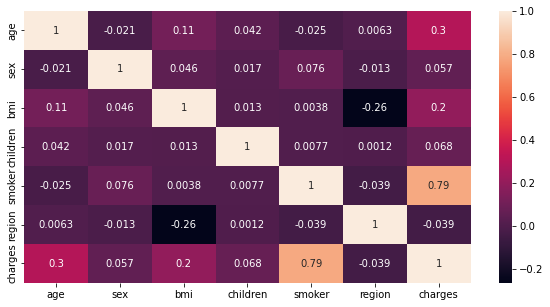

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_corr, annot = True)
plt.show()

In [19]:
#Now lets split the data into X and Y Variables

In [20]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
X = np.array(data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']])
y = np.array(data['charges'])

In [22]:
print(X)
print(y)

[[19.    0.   27.9   0.    1.    2.  ]
 [18.    1.   33.77  1.    0.    1.  ]
 [28.    1.   33.    3.    0.    1.  ]
 ...
 [18.    0.   36.85  0.    0.    1.  ]
 [21.    0.   25.8   0.    0.    2.  ]
 [61.    0.   29.07  0.    1.    3.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [23]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.20, random_state = 42)

In [24]:
#Lets train the model now. For now i will use only random forest regressor. You can use more regression model to check which
#one performs better.

model = RandomForestRegressor()

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
#Model prediction
Y_Pred = model.predict(X_test)

In [27]:
data = pd.DataFrame(data = {'Predicted Premium Amount': Y_Pred})
data.head()

,Predicted Premium Amount
0,10941.388007
1,5381.068658
2,28472.658134
3,10366.012832
4,34499.563759


In [28]:
#Lets check the model performance using R2
r2score = r2_score(y_test, Y_Pred)

In [29]:
r2score

0.8635184352934503

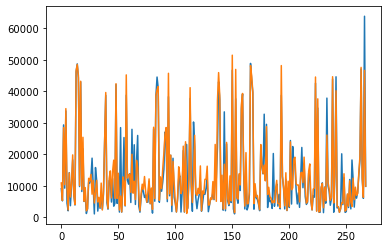

In [30]:
plt.plot(y_test)
plt.plot( Y_Pred)
plt.show()

In [31]:
#PREDICTIVE SYSTEM

In [40]:
input_data = (31,0,25.74,0,0,1)

In [41]:
input_data_array = np.asarray(input_data)

In [42]:
input_data_array_reshape = input_data_array.reshape(1, -1)

In [43]:
prediction = model.predict(input_data_array_reshape)

In [44]:
prediction

array([3770.4876565])